In [2]:
conda install -c conda-forge yfinance


Retrieving notices: ...working... done
done
Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::holoviews==1.15.0=py39hecd8cb5_0
  - defaults/noarch::tifffile==2021.7.2=pyhd3eb1b0_2
  - defaults/osx-64::imageio==2.19.3=py39hecd8cb5_0
  - defaults/osx-64::conda==23.1.0=py39hecd8cb5_0
  - defaults/noarch::requests-file==1.5.1=pyhd3eb1b0_0
  - anaconda/noarch::google-auth==2.6.0=pyhd3eb1b0_0
  - defaults/osx-64::bottleneck==1.3.5=py39h67323c0_0
  - defaults/noarch::cookiecutter==1.7.3=pyhd3eb1b0_0
  - defaults/osx-64::scikit-image==0.19.2=py39hae1ba45_0
  - defaults/osx-64::anaconda-project==0.11.1=py39hecd8cb5_0
  - anaconda/osx-64::_anaconda_depends==2022.05=py39_0
  - defaults/osx-64::datashape==0.5.4=py39hecd8cb5_1
  - defaults/osx-64::mkl_random==1.2.2=py39hb2f4e1b_0
  - defaults/osx-64::numexpr==2.8.3=py39h2e5f0a9_0
  - defaults/osx-64::imagecodecs==2021.8.26=py39

In [1]:
!pip install yahoo.fin

In [2]:
!pip install matplotlib

In [23]:
import yfinance as yf
from yahoo_fin import stock_info as si
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use("dark_background")

In [27]:
#Make a list of the stocks you want to use
stocks = ['AAPL', 'META', 'TSLA', 'MSFT','ABBV', 'BABA', 'NVDA','CCL']

In [28]:
amounts = [20, 15, 20, 60, 50, 20, 30, 40]

#CHECK THE LENGHT IS THE SAME
print(len(stocks))
print(len(amounts))

8
8


START DIVERSIFICATION:

In [29]:
values = [si.get_live_price(stocks[i]) * amounts[i] for i in range(len(stocks))]

/Users/alejandrareyes/opt/anaconda3/lib/python3.9/site-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]
/Users/alejandrareyes/opt/anaconda3/lib/python3.9/site-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]
/Users/alejandrareyes/opt/anaconda3/lib/python3.9/site-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

In [31]:
sectors= [yf.Ticker(x).get_info()['industry'] for x in stocks]
countries= [yf.Ticker(x).get_info()['country'] for x in stocks]
market_caps= [yf.Ticker(x).get_info()['marketCap'] for x in stocks]

In [32]:
cash = 40000


In [33]:
etfs = ['IVV','XWD.TO']
etf_amounts = [30,20]
etf_values = [si.get_live_price(etfs[i]) * etf_amounts[i] for i in range(len(etfs))]

/Users/alejandrareyes/opt/anaconda3/lib/python3.9/site-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]
/Users/alejandrareyes/opt/anaconda3/lib/python3.9/site-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]


In [34]:
etf_values

[13026.299743652344, 1419.7999572753906]

In [38]:
cryptos = ['ETH-USD','BTC-USD']
cryptos_amounts = [0.89,0.34]
crypto_values = [si.get_live_price(cryptos[i]) * etf_amounts[i] for i in range(len(cryptos))]
                 
general_dist = {'Stocks':sum(values),
                'ETFs': sum(etf_values),
                'Cryptos': sum(crypto_values),
                'Cash': cash,
               }
sector_dist = {}
for i in range(len(sectors)):
    if sectors[i] not in sector_dist.keys():
        sector_dist[sectors[i]] = 0
    sector_dist[sectors[i]] += values[i]

/Users/alejandrareyes/opt/anaconda3/lib/python3.9/site-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]
/Users/alejandrareyes/opt/anaconda3/lib/python3.9/site-packages/yahoo_fin/stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]


In [44]:
country_dist = {}
for i in range(len(countries)):
    if countries[i] not in country_dist.keys():
        country_dist[countries[i]] = 0
    country_dist[countries[i]] += values[i]

In [40]:
#market cap is not categories but numbers instead

market_cap_dist = {'small': 0.0, 'mid': 0.0, 'large': 0.0, 'huge': 0.0}
for i in range (len(stocks)):
    if market_caps[i] <200000000:
        market_cap_dist['small'] += values[i]
    elif market_caps[i] <100000000:
        market_cap_dist['mid'] += values[i]
    elif market_caps[i] <1000000000:
        market_cap_dist['large'] += values[i] 
    else:
        market_cap_dist['huge'] += values[i]

Text(0.5, 1.0, 'Marketcap distribution')

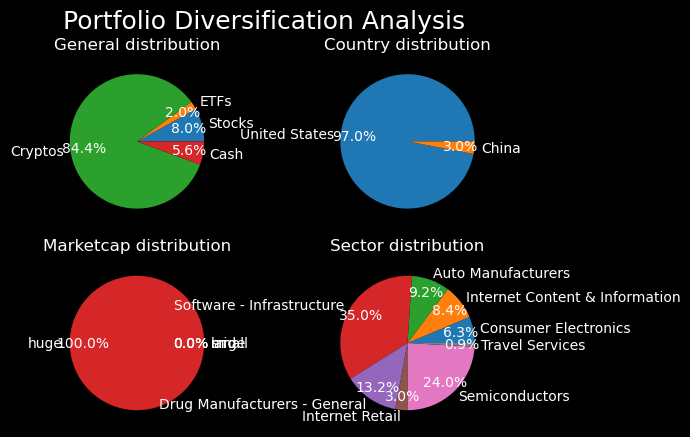

In [45]:
fig, axs = plt.subplots (2,2)

fig.suptitle('Portfolio Diversification Analysis', fontsize =18)
axs[0,0].pie(general_dist.values(), labels = general_dist.keys(), autopct = '%1.1f%%', pctdistance = 0.8, colors = mcolors.TABLEAU_COLORS)
axs[0,0].set_title('General distribution')
axs[0,1].pie(country_dist.values(), labels = country_dist.keys(), autopct = '%1.1f%%', pctdistance = 0.8, colors = mcolors.TABLEAU_COLORS)
axs[0,1].set_title('Country distribution')
axs[1,1].pie(sector_dist.values(), labels = sector_dist.keys(), autopct = '%1.1f%%', pctdistance = 0.8, colors = mcolors.TABLEAU_COLORS)
axs[1,1].set_title('Sector distribution')
axs[1,0].pie(market_cap_dist.values(), labels = market_cap_dist.keys(), autopct = '%1.1f%%', pctdistance = 0.8, colors = mcolors.TABLEAU_COLORS)
axs[1,0].set_title('Marketcap distribution')


Using a dictionary here: 

In [16]:
client_data = {}

In [21]:
client_data['Client 1'] = {'AAPL': 20, 'META': 15, 'TSLA': 20, 'MSFT': 60, 'ABBV': 50}
client_data['Client 2'] = {'AAPL': 30, 'META': 10, 'TSLA': 20, 'MSFT': 10, 'ABBV': 60}

client1_aapl_amount, client2_aapl_amount = client_data['Client 1'].get('AAPL', 0), client_data['Client 2'].get('AAPL', 0)
client1_aapl_amount, client2_aapl_amount

(20, 30)